In [1]:
import lib.RayTracer as RT
import math
import numpy as np
import time
from PIL import Image
from stl import mesh

#define render window size
(w, h) = (640, 480)

Vec4| x: [1.] y: [0.] z: [0.] t: [0.]
Vec4| x: [1.66666667] y: [0.] z: [0.] t: [-1.33333333]
Vec4| x: [1.] y: [0.] z: [0.] t: [0.]
Vec4| x: [1.66666667] y: [0.] z: [0.] t: [-1.33333333]
Vec4| x: [-1.] y: [0.] z: [0.] t: [0.]
Vec4| x: [1.1785113] y: [1.1785113] z: [0.] t: [-1.33333333]
Vec4| x: [0.70710678] y: [-0.70710678] z: [0.] t: [0.]
Frame| [ Origin: Vec3| x: [1.] y: [0.] z: [0.] ], [ Velo: Vec3| x: [0.6] y: [0.] z: [0.] ]
Frame| [ Origin: Vec3| x: [7.42857143] y: [10.42857143] z: [-0.] ], [ Velo: Vec3| x: [0.6] y: [0.6] z: [0.] ]
Vec3| x: [-0.6] y: [0.8] z: [0.]


# Test raytracer

In [2]:
# Using an existing stl file:
your_mesh = mesh.Mesh.from_file('models/block100.stl')
your_mesh.v0

array([[  0., 100., 100.],
       [  0.,   0., 100.],
       [100., 100., 100.],
       [100.,   0., 100.],
       [100., 100.,   0.],
       [100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,   0.,   0.],
       [100., 100., 100.],
       [  0., 100., 100.],
       [100.,   0.,   0.],
       [  0.,   0.,   0.]], dtype=float32)

Created mesh.
finished unpacking
[<lib.RayTracer.Sphere object at 0x000002B5D00CC910>, <lib.RayTracer.Sphere object at 0x000002B5D00CCAC0>, <lib.RayTracer.CheckeredSphere object at 0x000002B5D00CCC70>, <lib.RayTracer.Triangle object at 0x000002B5D00A2EC0>, <lib.RayTracer.Triangle object at 0x000002B5D00A3130>, <lib.RayTracer.Triangle object at 0x000002B5D00A33A0>, <lib.RayTracer.Triangle object at 0x000002B5D00A3A60>, <lib.RayTracer.Triangle object at 0x000002B5D00A3700>, <lib.RayTracer.Triangle object at 0x000002B5D00A3490>, <lib.RayTracer.Triangle object at 0x000002B5D00A2620>, <lib.RayTracer.Triangle object at 0x000002B5D00A3E80>, <lib.RayTracer.Triangle object at 0x000002B5D00A3C10>, <lib.RayTracer.Triangle object at 0x000002B5D00A2950>, <lib.RayTracer.Triangle object at 0x000002B5D00CD300>, <lib.RayTracer.Triangle object at 0x000002B5D00CF6D0>]
Frame| [ Origin: Vec3| x: [0.75] y: [0.1] z: [1.] ], [ Velo: Vec3| x: [0] y: [0] z: [0] ]
Frame| [ Origin: Vec3| x: [0.] y: [-99999.5] z: 

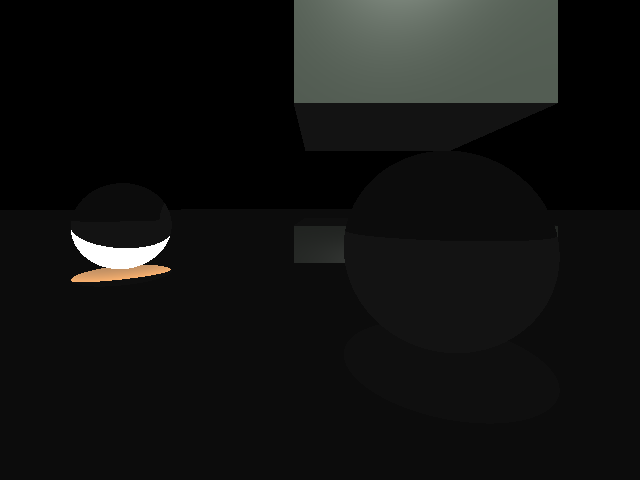

In [3]:
#     Sphere(vec3(.75, .1, 1), .6, rgb(0, 0, 1)),
#     Sphere(vec3(-.75, .1, 2.25), .6, rgb(.5, .223, .5)),
#     Sphere(vec3(-2.75, .1, 3.5), .6, rgb(1, .572, .184)),
# 	Triangle(vec3(-0.3, -0.1, 1), vec3(-0.4, .5, .5), vec3(-0.35, .5, 2), None, rgb(1, 0.6, 0), 0.9),
# 	Triangle(vec3(-0.3, -0.1, 1), vec3(-0.35, .5, 2), vec3(3, 0.4, 2.5), None, rgb(1, 1, 1), 0.9),
# CheckeredSphere(vec3(0, -99999.5, 0), 99999, rgb(.75, .75, .75), 0.25),


scene = [
	RT.Sphere(RT.vec3(.75, .1, 1), .6, RT.rgb(0, 0, 1)),
	RT.Sphere(RT.vec3(-2.75, .1, 3.5), .6, RT.rgb(1, .572, .184)),
	RT.CheckeredSphere(RT.vec3(0, -99999.5, 0), 99999, RT.rgb(.75, .75, .75), 0.25),
	RT.Mesh(RT.vec3(-10, 40, 120),
	     mesh.Mesh.rotation_matrix(np.array([1, 0, 0]), math.radians(0)),
	     your_mesh,
	     RT.rgb(.7, .8, .7), 0.5)
]

# unpack scene (mesh into triangles)
offset = 0
for i in range(len(scene)):
	if scene[i].type == 2:
		for t in scene[i].tArray:
			scene.insert(i, t)
			offset += 1
		scene.pop(i+offset)
print("finished unpacking")
print(scene)
# finish unpacking

r = float(w) / h
# Screen coordinates: x0, y0, x1, y1.
S = (-1, 1 / r + .25, 1, -1 / r + .25)
x = np.tile(np.linspace(S[0], S[2], w), h)
y = np.repeat(np.linspace(S[1], S[3], h), w)

t0 = time.time()
Q = RT.vec3(x, y, 0)
color = RT.raytrace(RT.E, (Q - RT.E).norm(), scene)
print ("Took", time.time() - t0)

rgb = [Image.fromarray((255 * np.clip(c, 0, 1).reshape((h, w))).astype(np.uint8), "L") for c in color.components()]
display(Image.merge("RGB", rgb))